## Python IO

### Read File

In [20]:
##### Method - 1 - Least Preferred

In [48]:

try:
    f = open("einstein.txt", "r")
    text = f.read()
    f.close()
except FileNotFoundError:
    text=None
print(text)

In [23]:
##### Method 2 - Safer Method ; no need to close the file as python takes care of it

In [24]:
with open("einstein.txt") as f:
    text = f.read()

print(text)

##### Write to a file [Working]

In [40]:
flowers=["Tulip","Daffodil","Poppy","Sunflower","Bluebell","Rose","Snowdrop"]

In [46]:
with open("flowers.txt", "w") as f:
    for flower in flowers:
        #f.write(flower)
        #f.write("\n")
        print(flower,file=f)


In [42]:
##### append to the file

In [45]:
with open("flowers.txt", "a") as f:
    print(23*"=", file=f)
    for flower in flowers:
        f.write(flower)
        f.write("\n")

##### Reading a CSV FData

In [64]:
#Method - 1

In [53]:
lines=[]
f = open("Google.csv")
for l in f:
    l=l.strip().split(',')
    lines.append(l)
f.close()



In [54]:
print(lines[0])
print(lines[1])

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
['19/08/2014', '585.002622', '587.342658', '584.002627', '586.862643', '978600', '586.862643']


In [55]:
#Method - 2 (using with)

In [56]:
lines=[]

with open("google.csv") as f:
    for line in f:
        line = line.strip().split(',')
        lines.append(line)

In [66]:
# method - 3 (using list comprehension)

In [47]:
lines = [line.strip().split(',') for line in open("google.csv")]

In [49]:
lines[0]

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [58]:
lines[1]

['19/08/2014',
 '585.002622',
 '587.342658',
 '584.002627',
 '586.862643',
 '978600',
 '586.862643']

In [62]:
import datetime


In [63]:
x=[]
for l in lines[1:]:
    x.append(datetime.datetime.strptime(l[0], '%d/%m/%Y'))

In [64]:
my_date = datetime.datetime.strptime(lines[1][0], '%d/%m/%Y')

In [65]:
y=[]
for l in lines[1:]:
    y.append(float(l[4]))

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5, 1.0, 'Google Stock Price')

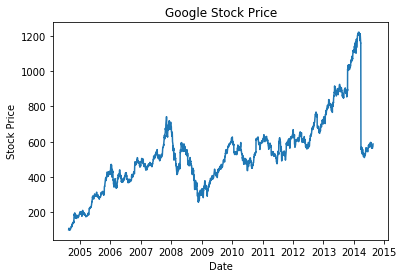

In [67]:
plt.plot(x,y)
plt.xlabel("Date")
plt.ylabel('Stock Price')
plt.title('Google Stock Price')

#### Read a google daily prices file, calculate the returns and store the returns to a new file
##### we will be using a new module called CSV

In [93]:
import csv
from datetime import datetime

In [96]:
path="google.csv"
file = open(path, newline='')
reader=csv.reader(file)
header=next(reader)
data=[]
for row in reader:
    #['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
    date=datetime.strptime(row[0],'%d/%m/%Y')
    open_price = float(row[1])
    high = float(row[2])
    low = float(row[3])
    close = float(row[4])
    volume = int(row[5])
    adj_close = float(row[6])
    data.append([date,open_price,high, low, close, volume,adj_close])
file.close()

In [97]:
data[0]

[datetime.datetime(2014, 8, 19, 0, 0),
 585.002622,
 587.342658,
 584.002627,
 586.862643,
 978600,
 586.862643]

In [103]:
x=[]
y=[]
google_retunrs_file = open("google_daily_returns.csv", "w", newline='')
write = csv.writer(google_retunrs_file)
write.writerow(["Date", "Return"])
daily_returns=[]
for i in range(len(data)-1):
    yesterdays_data_row = data[i]
    yesterdays_price = yesterdays_data_row[-1]
    yesterday_date = yesterdays_data_row[0]
    todays_data_row = data[i+1]
    todays_price = todays_dIf ata_row[-1]
    todays_date = todays_data_row[0].date()
    daily_returns = (todays_price-yesterdays_price)/yesterdays_price*100
    write.writerow([todays_date,daily_returns])
    x.append(todays_date)
    y.append(daily_returns)
google_retunrs_file.close()

Text(0.5, 1.0, 'Google Daily Returns')

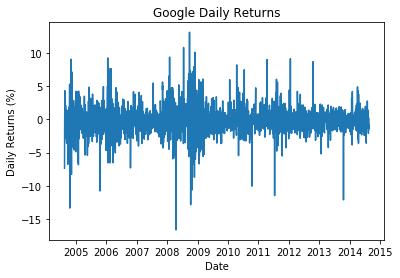

In [104]:
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.title('Google Daily Returns')